# Problem 4 [Networking at larger scale]
> **Count the number of connections (edges) to a vertex (node) in one of your sample networks from Problem 3**. This statistic is the degree of that vertex. The vertex degrees for all vertices in a random network are random. Vertex degree is a binomially distributed statistic for small networks.
**Plot a histogram of vertex degrees for one of your sample networks in Problem 3.** Repeat for the other sample network.
**Generate a network with (n, p) = (250, 0.08) and plot the histogram of its vertex degrees. What distribution fits this data?** Justify your claim with any **probabilistic limit laws** you know.

Recall the code from Problem 3,

<IPython.core.display.Javascript object>


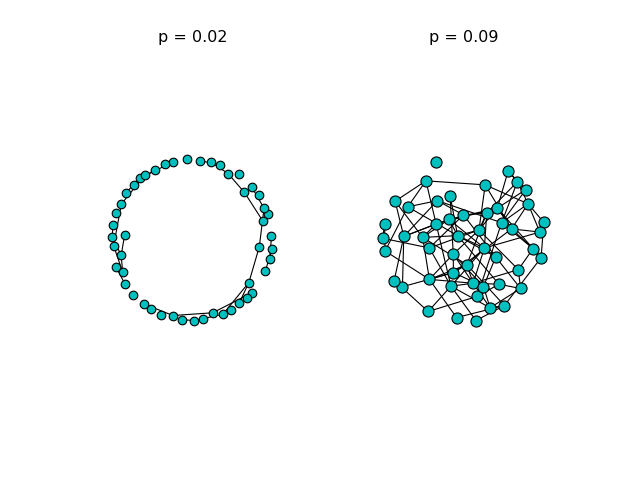

In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# Initialize the network graph.
G1 = nx.Graph()
G2 = nx.Graph()
# Generate n = 50 points add add them to the graph.
npeople = np.arange(1,50,1)
G1.add_nodes_from(npeople)
G2.add_nodes_from(npeople)
# Generate the connection of points and get the edges
s = np.random.rand(50,50)
s = np.tril(s,k=-1)
edges1 = np.argwhere(s>=1-0.02)
edges2 = np.argwhere(s>=1-0.09)
# Add the edges to the graph.
G1.add_edges_from(edges1)
G2.add_edges_from(edges2)
# Plot the network graph.
plt.subplot(121)
nx.draw(G1,node_size=60,edge_color='k', node_color='c')
plt.title('p = 0.02')
plt.axis('equal')
plt.show()
plt.subplot(122)
nx.draw(G2,node_size=100,edge_color='k',node_color='c')
plt.title('p = 0.09')
plt.axis('equal')
plt.show()

We pick the $p=0.09$ network as our sample.

<IPython.core.display.Javascript object>


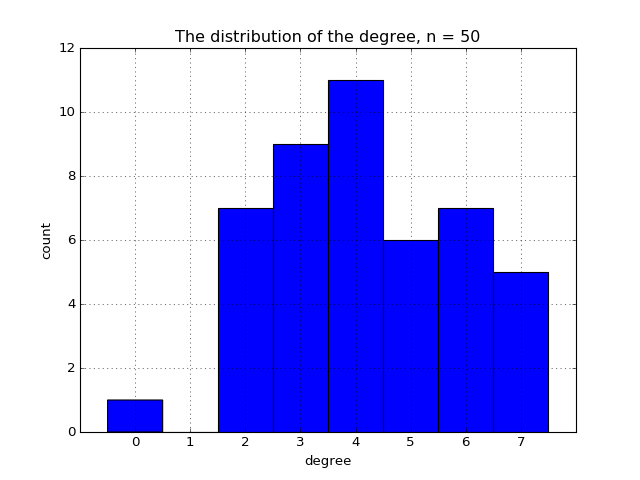

In [18]:
t = np.reshape(edges2,np.size(edges2))
n, bins = np.histogram(t,bins=np.arange(min(t)-0.5,max(t)+0.5,1))
plt.figure()
plt.hist(n,bins=np.arange(min(n)-0.5,max(n)+0.5,1))
plt.title('The distribution of the degree, n = 50')
plt.ylabel('count')
plt.xlabel('degree')
plt.grid()
plt.xticks(np.arange(min(n),max(n),1))
plt.show()

Next, we generate the network with n = 250, p = 0.08.

<IPython.core.display.Javascript object>


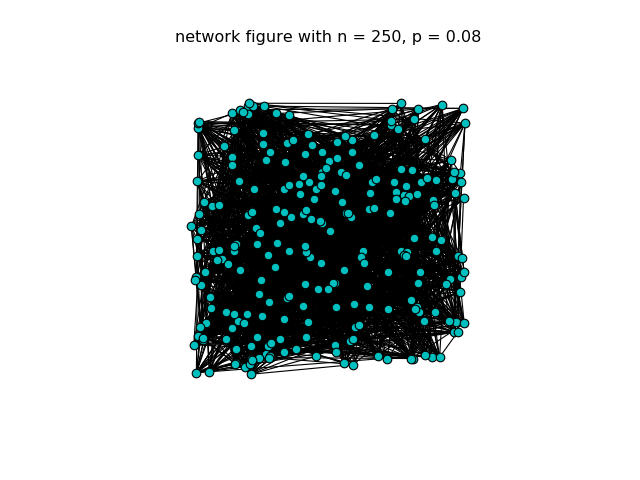

In [19]:
# Initialize the network graph.
G3 = nx.Graph()
# Generate n = 250 points add add them to the graph.
npeople = np.arange(1,250,1)
G3.add_nodes_from(npeople)
# Generate the connection of points and get the edges
#np.random.seed(123)
s = np.random.rand(250,250)
s = np.tril(s,k=-1)
edges3 = np.argwhere(s>=1-0.08)
# Add the edges to the graph.
G3.add_edges_from(edges3)
# Plot the network graph.
plt.figure()
plt.subplot(111)
nx.draw_random(G3,node_size=60,edge_color='k', node_color='c')
plt.axis('equal')
plt.title('network figure with n = 250, p = 0.08')
plt.show()

<IPython.core.display.Javascript object>


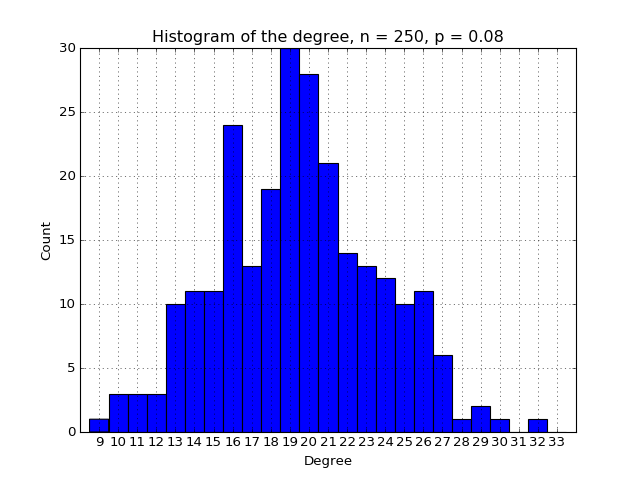

In [20]:
t = np.reshape(edges3,np.size(edges3))
n, bins = np.histogram(t,bins=np.arange(min(t)-0.5,max(t)+0.5,1))
plt.figure()
on,bins,patches = plt.hist(n,bins=np.arange(min(n)-0.5,max(n)+0.5,1))
plt.xticks(np.arange(min(n),max(n)))
plt.xlim(min(n)-1,max(n))
plt.grid()
plt.title('Histogram of the degree, n = 250, p = 0.08')
plt.ylabel('Count')
plt.xlabel('Degree')
plt.show()

<IPython.core.display.Javascript object>


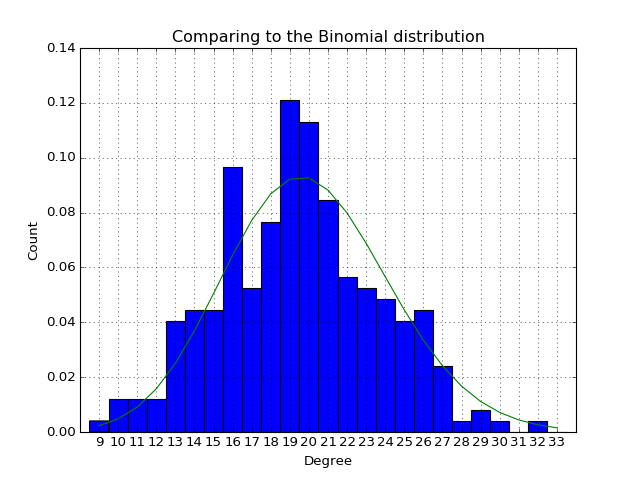

In [21]:
from scipy.stats import binom
x = np.arange(min(n),max(n))
bpmf = binom.pmf(x , 250, 0.08)
plt.figure()
plt.hist(n,bins=np.arange(min(n)-0.5,max(n)+0.5,1), normed=1)
plt.plot(x, bpmf)
plt.xticks(np.arange(min(n),max(n)))
plt.xlim(min(n)-1,max(n))
plt.grid()
plt.title('Comparing to the Binomial distribution')
plt.ylabel('Count')
plt.xlabel('Degree')
plt.show()

For each point and one of the rest $n-1$ points, they have a probability of $p$ to be connected. It is like doing the Bernoulli trials for $n-1$ times. So the degree of each point should have a binomial distribution $B(n = 250, p = 0.08)$.  
Let us do a chi-square test to see the goodness of fit.

In [22]:
from scipy.stats import chisquare
en = bpmf * np.sum(on)
# Combine the group with sample count smaller than 5 into the smallest group with count > 5.
com_index = np.logical_or(on < 5,en < 5)
if com_index.size == False > 0:
    into_index = on[com_index == False].argmin()
    new_on = on[com_index == False]
    new_en = en[com_index == False]
    new_on[into_index] += sum(on[com_index])
    new_en[into_index] += sum(en[com_index])
else :
    new_on = on
    new_en = en
# The  chisquare test.
print(chisquare(new_on,new_en))

Power_divergenceResult(statistic=24.580281263899117, pvalue=0.42884696991586818)


The pvalue is greater than the often used significant level $\alpha = 0.05$, so it means a good fit.